# MRI brain tumor classification using deep neural network

## Table of contents
* [1. Introduction](#introduction)
* [2. Methodology](#methodology)
  * [2.1 Defining the problem and assembling the dataset2](#define_problem)
    * [2.1.1 Hypothesis](#hypothesis)
  * [2.2 Choosing a measure of success](#define_success)
  * [2.3 Deciding on an evaluation protocol](#define_evaluation)
  * [2.4 Preparing your data ](#prep_data)
    * [2.4.1 Import necassary libraries](#libaries)
    * [2.4.2 Helper functions](#helper_functions)
    * [2.4.3 Load the data](#load_data)
    * [2.4.4 Preprocessing the data](#preprocess)
    * [2.4.5 Creating validation and training sets](#validation_set)
  * [2.5 Developing a model that does better than a baseline](#baseline)
    * [2.5.1 Model 1: Simple network](#model1)
    * [Analysis of Experiment 1](#analysis_model1)
  * [2.6 Scaling up: developing a model that overfits](#overfit)
    * [2.6.1 Model 2: Overfit model](#model2)
    * [Analysis of Experiment 2](#analysis_model2)
  * [2.7 Regularizing your model and tuning your hyperparameters](#regularizing)
    * Experiment with filters    
    * [2.7.1 Model 3: filters of 32-32](#model3)
      * [Analysis of Experiment 3](#analysis_model3)
    * [2.7.2 Model 4: filters of 32-64-64](#model4)
      * [Analysis of Experiment 4](#analysis_model4)
    * [2.7.3 Model 5: filters of 32-64-128](#model5)
      * [Analysis of Experiment 5](#analysis_model5)
    * [2.7.4 Model 6: filters of 32-64-128-512](#model6)
      * [Analysis of Experiment 6](#analysis_model6)
    * Experiment with kernal size  
    * [2.7.5 Model 7: kernal of (1,1)](#model7)
      * [Analysis of Experiment 7](#analysis_model7)
    * [2.7.6 Model 8: kernal of (5,5)](#model8)
      * [Analysis of Experiment 8](#analysis_model8)
    * [2.7.7 Model 9: kernal of (2,2)](#model9)
      * [Analysis of Experiment 9](#analysis_model9)
    * Experimenting with drop out
    * [2.7.9 Model 10: dropout of 0.2](#model10)
      * [Analysis of Experiment 10](#analysis_model10)
    * [2.7.10 Model 11: dropout of 0.5](#model11)
      * [Analysis of Experiment 11](#analysis_model11)
    * [2.7.11 Model 12: dropout of 0.6](#model12)
      * [Analysis of Experiment 12](#analysis_model12)
    * Experimenting with learning rate
    * [2.7.12 Model 13: Learning rate set to 1e-10](#model3)
      * [Analysis of Experiment 13](#analysis_model3)
    * [2.7.13 Model 14: Learning rate set to 1e-5](#model14)
      * [Analysis of Experiment 14](#analysis_model14)
    * [2.7.14 Model 15: Learning rate set to 1e-4](#model15)
      * [Analysis of Experiment 15](#analysis_model15)
    * [2.7.15 Model 16: Batch normalization](#model16)
      * [Analysis of Experiment 16](#analysis_model16)
    * Experimenting with batch normalization
    * [2.7.16 Model 17: Batch normalization](#model17)
      * [Analysis of Experiment 17](#analysis_model17)      
    * Experimenting with data augmentation  
    * [2.7.17 Model 18: Data augmentation](#model18)
      * [Analysis of Experiment 18](#analysis_model18)
    * Experimenting with feature extraction  
    * [2.7.18 Model 19: Feature extraction](#model19)
      * [Analysis of Experiment 19](#analysis_model19)
    * Experimenting with feature extraction and fine tuning
    * [2.7.19 Model 20: fine tuning(Final)](#model20)
      * [Analysis of Experiment 20 (Final)](#analysis_model20)
* [3 Results](#results)
  * [3.1 Final model](#final_model)
    * [3.1.1 Retrain the model at the optimal epoch](#retrain)
    * [3.1.2 Testing the final model](#testing)
* [4 Conclusions](#conclusion)
  * [4.1 Revisiting the hypothesis](#revisit_hypothesis)
  * [4.2 Future investigation](#future_investigations)
* [5 References](#references)



## 1. Introduction <a class="anchor" id="introduction"></a>
For this investigation I will be following the universal workflow for machine learning to perform the task of multiclass classification on MRI brain tumour image dataset, using computer vision techniques. The investigation will 
determine whether the task of classifying Brain Tumor from MRI scans can be achieved using Convolutional Neural Network (CNN). 

Throughout this investigation, I will define the problem, hypothesis, measure of success and the evaluation protocol. I will then mention the CNN models I have developed for this task and will examine the various approaches to issues faced by each model design. Moreover, I will compare each model's performance, and determine the optimal model design for the task of classifying brain tumours.

## 2. Methodology <a class="anchor" id="methodology"></a>
### 2.1 Defining the problem and assembling the dataset <a class="anchor" id="define_problem"></a>
The identification of brain tumours may be a challenging task as the nature of brain tumours is complex. Complex as in, there are a lot of abnormalities in the size and the location of the brain tumour (s). Due to this, it makes it really difficult to achieve a complete understanding of the tumour.  


### The dataset
The dataset is made by Sartaj on Kaggal, it consists of in total 3264 images of brain tumours ranging from 4 categories:
1. Glioma tumour 
2. Meningioma tumour
3. No tumour
4. Pituitary tumour

The dataset comes in two sets: training and testing. Both of these are further partitioned into 4 subfolders representing the categories. Within these folders contain MRI images. However, these images differ in dimensions, which means the data will have to be normalised to a fixed height and width during the preprocessing. 
The input data will be images pre-processed into numerical form so that the model can interpret them. The model aims to detect and classify tumours from the input data. As the dataset contains 4 categories, the problem for this task will be multiclass classification.

#### 2.1.1 Hypothesis <a class="anchor" id="hypothesis"></a>
- The data I will be using will be sufficient enough to learn the relationship between inputs and outputs.
- The classification of MRI brain tumours can be predicted from the given input data.


## 2.2 Choosing a measure of success <a class="anchor" id="define_success"></a>
A measure of success will be required as it will help me know how good the model is. Accuracy will be the measurement of success. Since the task is a multi-class classification, I will be using the "categorical_crossentropy" for my loss function, and this will be dependent on the measurement of success. I will be using loss and accuracy metrics to measure the success of the model. The accuracy will be expressed as a percentage, so if the accuracy is "0.80", it would mean the model has achieved 80% accuracy, ideally, we want the accuracy to be as high as possible. Whereas for the loss, we want the loss to be as low as possible, ideally, under 0, anything higher than that would indicate overfitting or underfitting.

## 2.3 Deciding on an evaluation protocol <a class="anchor" id="define_evaluation"></a>
One of the theories of the deep learning workflow is to initially begin with a small model, then start to build upon the model until the model begins to overfit. Overfitting is normal, it happens when the Model learns patterns that are specific to the data it has been trained with, however completely irrelevant to new data, and in turn, may mean the model will perform worse on the new data.

Identifying when the model overfits is a vital step towards mitigating overfitting and achieving the best optimal model for the task. Having an evaluation protocol will help us identify this.

Maintaining hold-out validation will be my evaluation protocol (I can use K-fold validation, but since I have a sufficient amount of data, this will not be necessary). This protocol involves splitting my data into three partitions: Train, Validation & Test. The validation set will be used to evaluate the model during training. If the model performs well on the validation set, this will indicate the model has been optimised, else it would mean overfitting has occurred.

## 2.4 Preparing your data <a class="anchor" id="prep_data"></a>
Before I can proceed with experimentation of various models, I must first prepare the dataset.
### 2.4.1 Import necassary libraries <a class="anchor" id="libaries"></a>






In [ ]:
#imports
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras import regularizers
from tensorflow import keras
import pandas as pd
import numpy as np
import cv2
import os

### 2.4.2 Helper functions <a class="anchor" id="helper_functions"></a>

Here, I have reserved several helper functions that will sever as tools throughout the investigation. Having these will make the process more convenient as it will enforce code reusability, avoiding the need to rewrite the same code several times. This in turn also makes the work more tidy and organised. 

To break down what I have, these are the helper functions:

- load_data : Function used for loading the data from a specified directory, decoding the data into its required numerical form (tensors), and then partitioning them into two sets (training, testing).
- plot_history_results : This function will take the model's history object as input, and will plot the history of the loss and accuracy after the model has been trained. 
- compare_models : This function, as the name suggests, compares two model's loss and accuracy.
- display_img : This will take the image tensor as input, and display the image.
- createModel : This function will be used to create a model with any custom design specified from the given parameter inputs.
- getModel : This function will be used to load predefined models that will be used througout the investigation.
- trainModel : This function will be used to initiate the training process for the model, it can be provided with call backlists. The function will return the model's training history.
- testModel : testModel will be used to examine the model's performance on unseen data, and will return the accuracy and loss.

In [ ]:
IMAGESIZE = 250
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
PATH = "./data/"

#Load training & testing data
def load_data():
  data = []
  labels = []
  for category in CATEGORIES:
    train_path = os.path.join(PATH,"Training",category)
    test_path = os.path.join(PATH,"Testing",category)
    label = CATEGORIES.index(category)
    #Iterate through the training directory
    for image in os.listdir(train_path):
      try:
        img = cv2.imread(os.path.join(train_path,image))
        img = cv2.resize(img,(IMAGESIZE,IMAGESIZE))
        data.append(img)
        labels.append(label)
      except:
        pass 
    #Iterate through the testing directory
    for image in os.listdir(test_path):
      try:
        img = cv2.imread(os.path.join(train_path,image))
        img = cv2.resize(img,(IMAGESIZE,IMAGESIZE))
        data.append(img)
        labels.append(label)
      except:
        pass     
  #One hot encode the labels
  labels = to_categorical(labels)     
  #Convert them to numpy array and shuffle the data
  from sklearn.utils import shuffle
  data = np.array(data)
  print(data.shape)
  labels = np.array(labels)
  data , labels = shuffle(data,labels)
  #Partition the data into X Y and normalize
  import math
  split = math.floor(len(data)*0.2)
  X_train = data[split:]
  Y_train = labels[split:]
  X_test = data[:split]
  Y_test = labels[:split]
  return (X_train, Y_train), (X_test, Y_test)

#Plots the model's validation and loss history
def plot_history_results(history_dict):
  plt.clf()
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  epochs = range(1,len(loss)+1)

  fig, axs = plt.subplots(1,2,figsize=(10,5))
  axs[0].set_title("Training and validation acc")
  axs[0].plot(epochs, acc, "b",label="training acc")
  axs[0].plot(epochs, val_acc, "r",label="Validation acc")
  axs[0].set_xlabel("Epochs")
  axs[0].set_ylabel("Accuracy")
  axs[0].legend(loc='upper left')

  axs[1].set_title("Training and validation loss")
  axs[1].plot(epochs, loss, "b",label="training loss")
  axs[1].plot(epochs, val_loss, "r",label="Validation loss")
  axs[1].set_xlabel("Epochs")
  axs[1].set_ylabel("Loss")
  axs[1].legend(loc='upper left')

  max_val_acc = max(val_acc)
  min_val_acc = min(val_acc)
  max_val_loss = max(val_loss)
  min_val_loss = min(val_loss)
  print("\nMax validation acc: "+str(max_val_acc)+"\nMin validation acc: "+str(min_val_acc)+"\nMax validation loss: "+str(max_val_loss)+"\nMin validation loss: "+str(min_val_loss))
  plt.show()

def compare_models(model_history1,model_history2,model_1,model_2):
  plt.clf()
  model1_loss = model_history1['val_loss']
  model2_loss = model_history2['val_loss']
  model1_acc = model_history1['val_accuracy']
  model2_acc = model_history2['val_accuracy']

  epochs = range(1,len(model1_loss)+1)

  fig, axs = plt.subplots(1,2,figsize=(10,5))
  axs[0].set_title(model_1+" and "+model_2+" acc")
  axs[0].plot(epochs, model1_acc, "r",label=model_1+" acc")
  axs[0].plot(epochs, model2_acc, "b",label=model_2+" acc")
  axs[0].set_xlabel("Epochs")
  axs[0].set_ylabel("Loss")
  axs[0].legend()

  axs[1].set_title(model_1+" and "+model_2+" loss")
  axs[1].plot(epochs, model1_loss, "r",label=model_1+" loss")
  axs[1].plot(epochs, model2_loss, "b",label=model_2+" loss")
  axs[1].set_xlabel("Epochs")
  axs[1].set_ylabel("Accuracy")
  axs[1].legend()
  plt.show()
    

#Displays the image of the given sample
def display_img(img_sample):
  plt.imshow(img_sample,cmap="gray")

In [ ]:
def createModel(inputShape,filters=[],kernal=(3,3),dropout="default", use_batch_normalization=False,learningRate="default",baseModel = None ):
  from tensorflow.keras import layers
  from tensorflow.keras import models

  #Create the model
  if baseModel is None:
    input = layers.Input(inputShape);
    x = input;
    for filter in filters:
      x = layers.Conv2D(filter,kernal,activation='relu')(x)
      x = layers.MaxPooling2D((2,2))(x)
      if(use_batch_normalization):
        x = layers.BatchNormalization()(x)
  else:
    input = baseModel.input  
    x = baseModel.output 

  #Flatten the model
  if(dropout!="default"):
      x = layers.Dropout(dropout)(x)
  x = layers.Flatten()(x)
  x = layers.Dense(16,activation="relu")(x)
  output = layers.Dense(4,activation="softmax")(x)

  #Compile the model
  model = models.Model(input,output)
  if(learningRate=="default"):
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
  else:
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizers.RMSprop(lr=learningRate),
                metrics=['accuracy'])

  #Return the model  
  return model 

def getModel(model,variables=()):
    if model=="baseline":
      filters = [16,32]
      return createModel((IMAGESIZE,IMAGESIZE,3),filters)
    elif model=="overfit":
      filters = [32,64]
      return createModel((IMAGESIZE,IMAGESIZE,3),filters)
    elif model=="tweak filters":
      filters = variables
      return createModel((IMAGESIZE,IMAGESIZE,3),filters)
    elif model=="tweak kernal":
      filters = [32,64,128,512]
      kernal_size = variables
      return createModel((IMAGESIZE,IMAGESIZE,3),filters,kernal=kernal_size)  
    elif model=="batch normalization":
      filters = [32,64,128,512]
      return createModel((IMAGESIZE,IMAGESIZE,3),filters,use_batch_normalization=True)
    elif model=="tweak dropout":
      filters = [32,64,128,512]
      dropOut = variables
      return createModel((IMAGESIZE,IMAGESIZE,3),filters,dropout=dropOut)
    elif model=="tweak learning rate":
      filters = [32,64,128,512]
      lr = variables
      return createModel((IMAGESIZE,IMAGESIZE,3),filters,learningRate=lr,dropout=0.5)
    elif model=="augmentation":
      filters = [32,64,128,512]
      return createModel((IMAGESIZE,IMAGESIZE,3),filters,dropout=0.5)
    elif model=="pre-trained network":
      input = VGG16(weights='imagenet',
                    include_top=False,
                    input_shape=(IMAGESIZE, IMAGESIZE, 3))
      input.trainable=False
      return createModel((IMAGESIZE,IMAGESIZE,3),dropout=0.5, baseModel=input)
    elif model=="fine tuned network":
      input = VGG16(weights='imagenet',
                    include_top=False,
                    input_shape=(IMAGESIZE, IMAGESIZE, 3))
      input.trainable=True
      set_trainable=False
      for layer in input.layers:
        if layer.name == 'block5_conv1':
            set_trainable = True
        layer.trainable = set_trainable 

      return createModel((IMAGESIZE,IMAGESIZE,3),dropout=0.5, baseModel=input)  
  

def trainModel(model,trainingSet,validationSet,epochs,batch=128,callback_list=[],useAugmentation=False):
  x_train,y_train = trainingSet
  x_val,y_val = validationSet
  if useAugmentation:
      from tensorflow.keras.preprocessing.image import ImageDataGenerator
      datagen = ImageDataGenerator(shear_range=0.2, zoom_range=0.2, rotation_range=20, horizontal_flip=True)
      train_generator = datagen.flow(x_train,y_train, batch_size=batch)
      validation_generator = datagen.flow(x_val, y_val, batch_size=batch)
      steps_per_epoch = len(x_train)//batch
      validation_steps = len(x_val)//batch
      return model.fit(train_generator,
                       epochs=epochs, 
                       steps_per_epoch=steps_per_epoch,
                       validation_data=(x_val, y_val),
                       validation_steps=validation_steps)
      
  return model.fit(x_train,y_train,
                    epochs = epochs,
                    batch_size = batch,
                    callbacks=callback_list,
                    validation_data=(x_val,y_val)) 

def testModel(model,X_test,Y_test):
  model.evaluate(X_test,Y_test)
  #prints the first 50 predictions 
  predictions = model.predict(X_test)
  print("Printing the first 50 predictions vs targets")
  for i in range(50):
    result = "\033[92m" if  np.argmax(predictions[i]) == np.argmax(Y_test[i]) else "\33[31m"
    print(result+"Predicted class: "+CATEGORIES[np.argmax(predictions[i])]+" vs Actual class : "+CATEGORIES[np.argmax(Y_test[i])])
  


### 2.4.3 Load the data <a class="anchor" id="load_data"></a>
The load_data() helper function will be called here to load the training & testing data. The data be partitioned into train and test, which will consist of input data and corresponding labels. The data has already been preprocessed into their numerical tensors.

In [ ]:
#Load the data
(X_train, Y_train), (X_test, Y_test) = load_data()

(2974, 250, 250, 3)


### 2.4.4 Preprocessing the data <a class="anchor" id="preprocess"></a>
The data will need to be preprocessed. Preprocessing is a task that involves vectorizing, normalization, handling missing values and feature extraction from data. This will help the data be more amendable so that DNN can use it. In this case, the data is casted as float32 and normalized from [0,255] to the range of [0,1], as it is preferred to use smaller values for Neural Networks.

In [ ]:
#Pre process the data
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

The X_train contains samples of MRI images, whereas the Y_train contains the labels. This is demonstrated below:

glioma_tumor


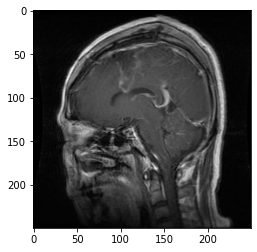

In [ ]:
index=1
display_img(X_train[index])
print(CATEGORIES[np.argmax(Y_train[index])])

### 2.4.5 Creating validation and training sets <a class="anchor" id="validation_set"></a>
This will be further split into validation and training sets. The validation set will be used to validate the model, it will also help determine if the model is "overfit" or "underfit". I will also use the modelcheckpoint call back as it will conveniently save every iteration of my experiment as a h5 file.

In [ ]:
#Create validation & partial training sets
import math
split = math.floor(len(X_train)*0.3)
partial_X_train = X_train[split:]
partial_Y_train = Y_train[split:]
X_val = X_train[:split]
Y_val = Y_train[:split]



callbacks = [                              
    keras.callbacks.ModelCheckpoint(            
        filepath='my_model.h5',                 
        monitor='val_loss',                     
        save_best_only=True,                    
    )
]

[471, 455, 282, 458]


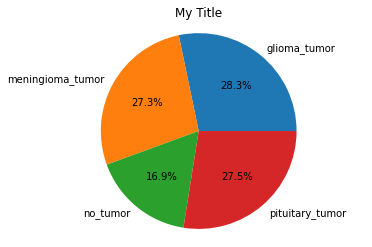

In [ ]:
categ = [0,0,0,0]
for i in partial_Y_train:
  categ[np.argmax(i)]+=1

print(categ)  
plt.pie(categ,labels=CATEGORIES,autopct='%1.1f%%')
plt.title('data')
plt.axis('equal')
plt.show()

## 2.5 Developing a model that does better than a baseline <a class="anchor" id="baseline"></a>
To establish that my model has statistical power and is valid for further development, I will need to confirm that it performs better than a dumb baseline. As my dataset contains 4 classes, the chance of randomly selecting the correct class is 1/4 (25% chance). Therefore, to have statistical power, my model will need to achieve accuracy greater than 1/4. If my model cannot beat the baseline, this would suggest the hypothesis I have made earlier has been false, and that statistical power cannot be achieved for this specific task.

For this model, I have used a sequential network of dense layers. The first layer will be using the "Relu" activation function and will have 64 hidden units. Since the task is a multiclass categorisation problem, the last layer of the model will have the "softmax" activation function, it has 47 units which is equal to the number of classes. The optimizer will be RMSPROP and its learning rate value will be set to the default value (the learning rate can be adjusted).

The model is set to be trained for 30 epochs with a mini-batch size of 128. The model will be trained using the training sets and will be evaluated using the validation sets created earlier.


### 2.5.1 Model 1: Simple network <a class="anchor" id="model1"></a>
Here, I will be carrying out my first experiment which will be a model that may underfit but will be enough to beat the baseline. The model will consist of 2 conv2d layers with filters of 16-32.
The model will be underfitting as the training and validation loss will still be lowered.

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 250, 250, 3)]     0         
                                                                 
 conv2d_35 (Conv2D)          (None, 248, 248, 16)      448       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 124, 124, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 61, 61, 32)       0         
 g2D)                                                            
                                                                 
 flatten_19 (Flatten)        (None, 119072)            0  

<Figure size 432x288 with 0 Axes>

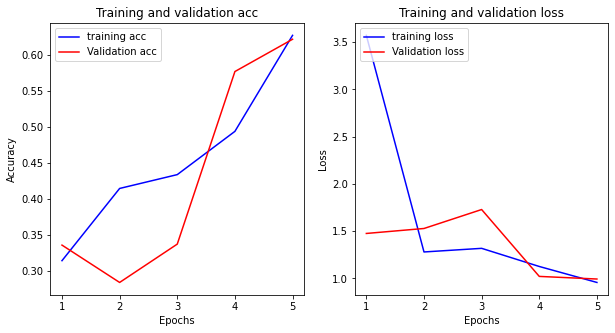

In [ ]:
model = getModel("baseline")
model.summary()
history1 = trainModel(model,trainingSet=(partial_X_train,partial_Y_train),validationSet=(X_val,Y_val),epochs=5,callback_list=callbacks)
plot_history_results(history1.history)

### Analysis of Experiment 1 <a class="anchor" id="analysis_model1"></a>
| Optimal epoch | Validation loss | Validation accuracy | Comments                                  |
|---------------|-----------------|---------------------|-------------------------------------------|
| 5             | 0.9930          | 0.6218              | Model beats the baseline, but is underfit |

The results shown from the plotted graph above suggest that the model is underfitting as the validation loss and the training loss are closely correlated, this shows there are still more patterns to be learnt. 
Fortunately, the model has clearly beaten the baseline of 25% as it has achieved 62% accuracy, thus demonstrating statistical power is possible.


## 2.6 Scaling up: developing a model that overfits <a class="anchor" id="overfit"></a>
The first model has successfully achieved statistical power, however, it still lacked the potential optimal weights, biases and number of layers for the problem. The next step is to develop a much larger model until overfitting can occur. This can be achieved simply by adding more layers, increasing units etc. The purpose of having this model enables us to draw a line to show where and when the model begins to overfit. We can use this info to regularise our model until we find the optimal model for the problem.

### 2.6.1 Model 2: Overfit model <a class="anchor" id="model2"></a>
For this experiment, I have upped the filters from the previous 16-32 to 32-64. Upping the filters will enable the model to learn a higher number of abstractions from the image data, however, this can also mean the model will learn unnecessary patterns specific to the training data, inevitably causing the model to be biased towards the training data. I have also upped the number of epochs to 50, so this will be enough time for the model to identify all the necessary patterns before it begins to overfit.

Model: "model_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 250, 250, 3)]     0         
                                                                 
 conv2d_73 (Conv2D)          (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_74 (Conv2D)          (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 61, 61, 64)       0         
 g2D)                                                            
                                                                 
 flatten_29 (Flatten)        (None, 238144)            0  

<Figure size 432x288 with 0 Axes>

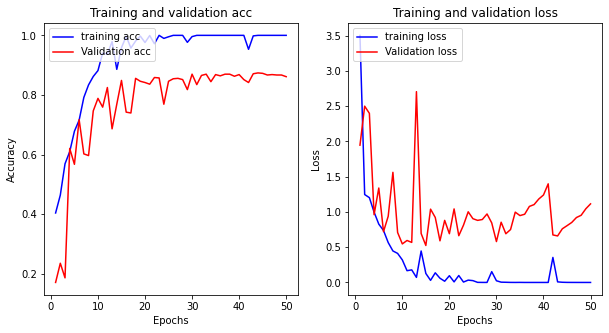

In [ ]:
model = getModel("overfit")
model.summary()
history2 = trainModel(model,trainingSet=(partial_X_train,partial_Y_train),validationSet=(X_val,Y_val),epochs=50,callback_list=callbacks)
plot_history_results(history2.history)

### Analysis of Experiment 2 <a class="anchor" id="analysis_model2"></a>
| Optimal epoch | Validation loss | Validation accuracy | Comments                                  |
|---------------|-----------------|---------------------|-------------------------------------------|
| 15             | 0.5240          | 0.8487              | The model begins to overfit after the 10th epoch |

The table shown above shows the model's validation loss and accuracy at the optimal epoch of 15.

The plotted graph above shows the model started well initially as the validation and training loss was decreasing and the validation and training accuracy was increasing. 

However, the model has begun to show symptoms of overfitting after the 10th epoch as the validation loss started to degrade, eventually resulting in a validation loss of 1.1139.

## 2.7 Regularizing your model and tuning your hyperparameters <a class="anchor" id="regularizing"></a>
Now that I've identified a model that overfits, I will now carry out several experiments using regularizing techniques to mitigate the effects of overfitting until I derive an optimal model.
The outline of these sections will be:
- Experimenting with filters
- Experimenting with kernels
- Experimenting with dropouts
- Experimenting with learning rate
- Experimenting with batch normalization
- Experimenting with data augmentation
- Experimenting with transfer learning & fine-tuning

## Experimenting with filters
Here, I will carry out a series of experiments of adjusting the filters for each layer until I find the model with the optimal filters. 
The filter is what makes a conv2d layer unique as it allows the model to detect low-level spatial patterns from the image. These patterns may be as simple as lines, shapes or as complex as faces from an image. Spatial patterns are also translation invariant, meaning once a pattern is detected in a certain position of the image, the convnet will be able to recognise it everywhere.

So having filters is powerful, however, a convnet isn't prone to overfitting, as filters may pick up irrelevant patterns specific to the training data, but completely irrelevant for testing data, so it's important to make sure we have the optimal filters, enough to generalise relevant patterns across any related data.

## 2.7.1 Model 3: filters of 32-32 <a class="anchor" id="model3"></a>
This experiment will use a filter of 32-32, will be trained for 50 epochs.

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 124, 124, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 122, 122, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 119072)            0   

<Figure size 432x288 with 0 Axes>

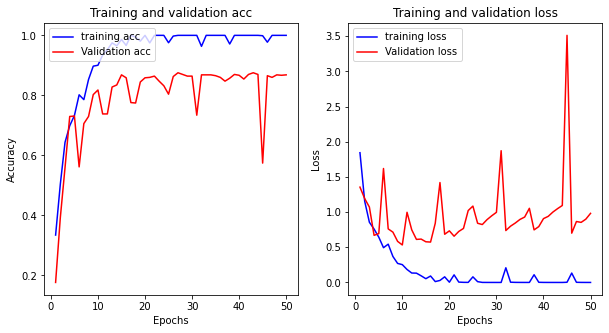

In [ ]:
filters = [32,32]
model = getModel("tweak filters",filters)
model.summary()
history3 = trainModel(model,trainingSet=(partial_X_train,partial_Y_train),validationSet=(X_val,Y_val),epochs=50,callback_list=callbacks)
plot_history_results(history3.history)


### Analysis of Experiment 3 <a class="anchor" id="analysis_model3"></a>
| Optimal epoch | Validation loss | Validation accuracy | Comments                                  |
|---------------|-----------------|---------------------|-------------------------------------------|
| 10        | 0.5330   | 0.8179            | Model starts off well but begins to overfit at the 5th epoch  |

The table shown above shows the model's validation loss and accuracy at the optimal epoch of 10.

The plotted graph above shows the training and validation loss started well, however, has begun to overfit after the 5th epoch. Compared to model 2, the use of 32-32 filters has shown similar results in the validation loss and accuracy. There the validation metrics seem unstable as they are fluctuating significantly.

Overall, the results showed little to no improvement with the filters of 32-32, and I've decided not to proceed with the next iteration of experiments with these filters.

## 2.7.2 Model 4: filters of 32-64-64 <a class="anchor" id="model4"></a>
This experiment will use a filter of 32-64-64, will be trained for 50 epochs.

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 250, 250, 3)]     0         
                                                                 
 conv2d_77 (Conv2D)          (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_77 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_78 (Conv2D)          (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 61, 61, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (None, 59, 59, 64)        369

<Figure size 432x288 with 0 Axes>

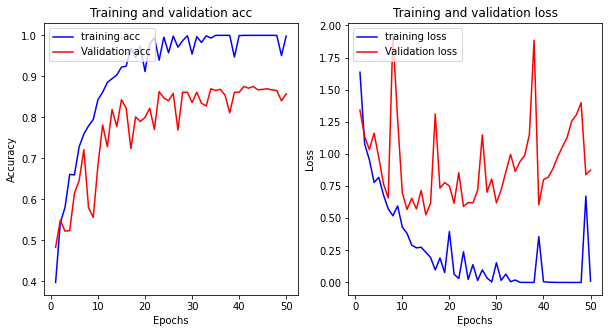

In [ ]:
filters = [32,64,64]
model = getModel("tweak filters",filters)
model.summary()
history5 = trainModel(model,trainingSet=(partial_X_train,partial_Y_train),validationSet=(X_val,Y_val),epochs=50,callback_list=callbacks)
plot_history_results(history5.history)


### Analysis of Experiment 4 <a class="anchor" id="analysis_model4"></a>
| Optimal epoch | Validation loss | Validation accuracy | Comments                                  |
|---------------|-----------------|---------------------|-------------------------------------------|
|15           |  0.5262      | 0.8431             | The model quickly begins to overfit after the 15th epoch and validation loss is very unstable. Overfitting occurs in epoch 10 |

The table shown above shows the model's validation loss and accuracy at the optimal epoch of 15

The plotted graph above shows that the validation loss has slightly improved compared to model 2 as it has achieved a low optimal validation loss of 0.5262. However, the validation metrics seem even more unstable compared to model 3, and overfitting occurs at epoch 10, as validation loss after this epoch stopped decreasing.

Overall, the model has shown some improvements when it comes to validation loss and accuracy, however, due to it overfitting a much later epoch and the validation metrics showing to be very unstable, I have not considered proceeding with these filters for the next iterations of experiments.


## 2.7.3 Model 5: filters of 32-64-128 <a class="anchor" id="model5"></a>
This experiment will use a filter of 32-64-128, will be trained for 50 epochs.

Model: "model_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 250, 250, 3)]     0         
                                                                 
 conv2d_80 (Conv2D)          (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_80 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_81 (Conv2D)          (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 61, 61, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_82 (Conv2D)          (None, 59, 59, 128)       738

<Figure size 432x288 with 0 Axes>

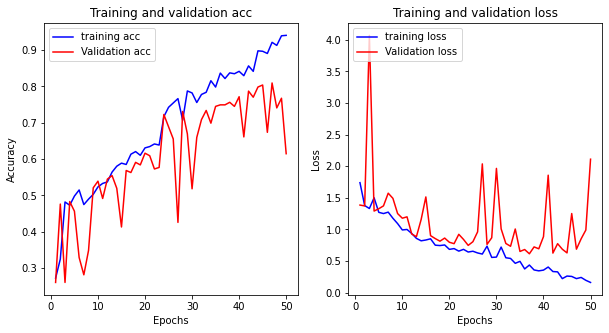

In [ ]:
filters = [32,64,128]
model = getModel("tweak filters",filters)
model.summary()
history6 = trainModel(model,trainingSet=(partial_X_train,partial_Y_train),validationSet=(X_val,Y_val),epochs=50,callback_list=callbacks)
plot_history_results(history6.history)


### Analysis of Experiment 5 <a class="anchor" id="analysis_model5"></a>
| Optimal epoch | Validation loss | Validation accuracy | Comments                                  |
|---------------|-----------------|---------------------|-------------------------------------------|
| 37          | 0.6134       |0.7493              |The validation loss and training loss shows a better correlation, however, it seems very unstable, and overfitting occurs after the 16th epoch   |

The table shown above shows the model's validation loss and accuracy at the optimal epoch of 37.

The plotted graph above shows the model is overfitting at around the 16th epoch, and the validation loss was the lowest recorded was 0.613, which was recorded in the 37th epoch. The additional filter of 128 showed major instability within the validation metrics, as it seems to be fluctuating significantly, and as a consequence, it resulted in a much worse loss of 2.1108 and accuracy of 0.6148 after 50 epochs. But the correlation between validation loss and training loss seemed to have improved. 

Overall, the use of 32-64-128 filters has resulted in unstable metrics and an overfitted model, hence I will not consider moving forward with these filters.

## 2.7.4 Model 6: filters of 32-64-128-512 <a class="anchor" id="model6"></a>
This experiment will use a filter of 32-64-128-512, will be trained for 50 epochs.

Model: "model_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_50 (InputLayer)       [(None, 250, 250, 3)]     0         
                                                                 
 conv2d_144 (Conv2D)         (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_144 (MaxPooli  (None, 124, 124, 32)     0         
 ng2D)                                                           
                                                                 
 conv2d_145 (Conv2D)         (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_145 (MaxPooli  (None, 61, 61, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_146 (Conv2D)         (None, 59, 59, 128)       738

<Figure size 432x288 with 0 Axes>

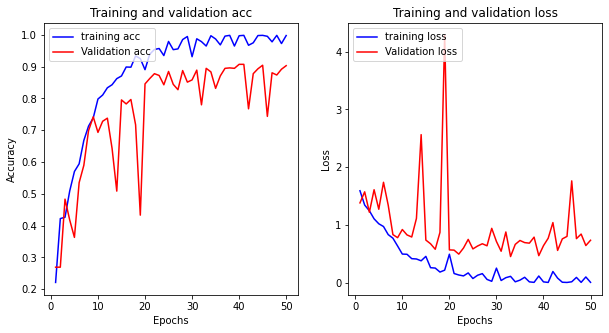

In [ ]:
filters = [32,64,128,512]
model = getModel("tweak filters",filters)
model.summary()
history7 = trainModel(model,trainingSet=(partial_X_train,partial_Y_train),validationSet=(X_val,Y_val),epochs=50,callback_list=callbacks)
plot_history_results(history7.history)


### Analysis of Experiment 6 <a class="anchor" id="analysis_model6"></a>
| Optimal epoch | Validation loss | Validation accuracy | Comments                                  |
|---------------|-----------------|---------------------|-------------------------------------------|
|33           |0.4516        |0.8950       |Sighnificant improvements within the validation loss and training. Overfitting occurs in epoch 20|

The table shown above shows the model's validation loss and accuracy at the optimal epoch of 47

The plotted graph above has shown significant improvements when it comes to validation loss and accuracy and the correlation between training loss and validation loss has become greater. The model started off pretty well, albeit the metrics show some instability, but fortunately seems to be stable later on. However, the model does overfit after the 20th epoch as validation loss starts to increase, but it does achieve a 90% validation accuracy. 

Overall, the use of these filters has shown very promising results! The next couple of experiments will be using these filters.


## Overall analysis of Experiments using filters 

| Model | Filters       | Optimal epoch | Validation loss | Validation accuracy |
|-------|---------------|---------------|-----------------|---------------------|
| 3     | 32-32         | 10            | 0.5330          | 0.8179              |
| 4     | 32-64-64      | 15            | 0.5262          | 0.8531              |
| 5     | 32-64-128     | 37            | 0.6134          | 0.7493              |
| 6     | 32-64-128-512 | 33            | 0.4516          | 0.8950              |

The table illustrated above gathers all the results achieved so far during the experiments with filters. As you can see, optimal validation loss and accuracy will improve as we add more layers with larger filters. Model 6 has proven that the filters of 32-64-128-512 are optimal as it has achieved the best validation loss and accuracy so far. 
The next optimal model is model 4, as the filters of 32-64-64 have also shown promising results within the validation loss and accuracy, however, it has begun to overfit at a much sooner epoch of 15. Whereas Model 5 has shown us that adding more layers with larger filters significantly mitigated overfitting as it occurs at a much later epoch of 38. 

Note that the following experiments will now use model 6's filters of 32-64-128-512.


## Experimenting with kernel size
For this series of experiments, I will be tuning the kernel size. A kernel in a CNN is a matrix filter that extracts features from an image. The kernel acts as a mask as it slides over the image, extracting features, and is what creates the feature map at each CNN layer. The size and complexity of the extracted features depend on the size of the kernel size. Larger kernels can extract more global features whereas smaller kernels can extract many low-level features. Here, I will be investigating the optimal kernel for the task.

I've decided not to involve the kernel size of (3,3) for the next experiment as the previous experiments have already used kernel size of (3,3) as default. 

## 2.7.5 Model 7: kernal of (1,1) <a class="anchor" id="model7"></a>
This experiment will use a kernel size of (1,1), will be trained for 50 epochs.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 250, 250, 32)      128       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      2112      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 128)       8320  

<Figure size 432x288 with 0 Axes>

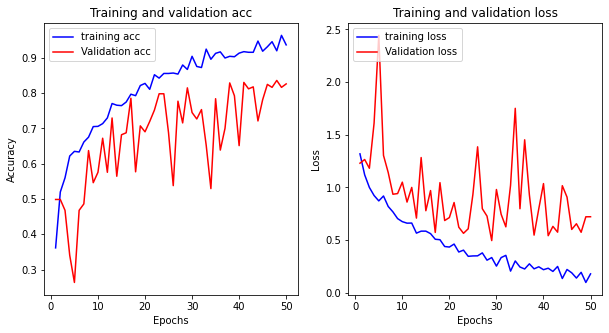

In [ ]:
kernal = (1,1)
model = getModel("tweak kernal",kernal)
model.summary()
history7 = trainModel(model,trainingSet=(partial_X_train,partial_Y_train),validationSet=(X_val,Y_val),epochs=50,callback_list=callbacks)
plot_history_results(history7.history)


### Analysis of Experiment 7 <a class="anchor" id="analysis_model7"></a>
| Optimal epoch | Validation loss | Validation accuracy | Comments                                  |
|---------------|-----------------|---------------------|-------------------------------------------|
| 29          | 0.4953       | 0.8151          |The use of (1,1) kernel size has slowed the progress of the validation loss and accuracy. Overfitting occurs after the 15th epoch.  |

The table shown above shows the model's validation loss and accuracy at the optimal epoch of 29

The plotted graph above illustrates the use of the kernel (1,1), which has shown the validation loss and accuracy progressed a lot slower compared to the previous experiments. The validation metrics still seem very noisy. Overfitting still occurs and can be seen after epoch 15

Overall, the use of (1,1) kernel size has shown little to no improvement, and only slowed the progress of the model.
## 2.7.6 Model 8: kernal of (5,5) <a class="anchor" id="model8"></a>
This experiment will use the kernel size of (5,5), will be trained for 50 epochs.

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 conv2d_20 (Conv2D)          (None, 246, 246, 32)      2432      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 123, 123, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 119, 119, 64)      51264     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 59, 59, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 55, 55, 128)       2049

<Figure size 432x288 with 0 Axes>

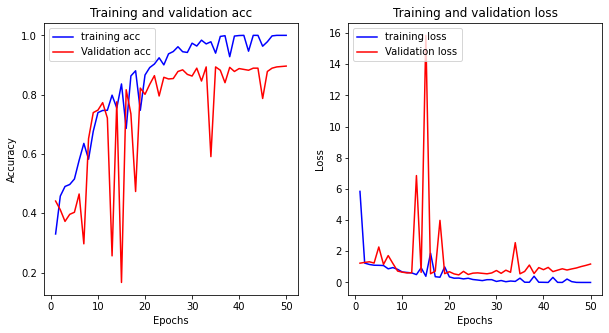

In [ ]:
kernal = (5,5)
model = getModel("tweak kernal",kernal)
model.summary()
history8 = trainModel(model,trainingSet=(partial_X_train,partial_Y_train),validationSet=(X_val,Y_val),epochs=50,callback_list=callbacks)
plot_history_results(history8.history)


### Analysis of Experiment 8 <a class="anchor" id="analysis_model8"></a>
| Optimal epoch | Validation loss | Validation accuracy | Comments                                  |
|---------------|-----------------|---------------------|-------------------------------------------|
| 22          |0.4842        | 0.8641       | Kernal size of (5,5) has to lead the model to overfit at a much sooner epoch of 16 with worse validation loss after 50 epochs.  |

The table shown above shows the model's validation loss and accuracy at the optimal epoch of 22.

The plotted graph above shows that the use of kernel size of (5,5) has led the validation accuracy and loss to become far more unstable, and overfitting occurred at a much sooner epoch of 15, as a consequence, the validation loss degraded to the value of 1.1799 after 50 epochs. This is usually because the larger kernel size has picked up patterns that are biased towards the training data, but completely irrelevant to the testing data.

Overall, the use of a larger kernel size of (5,5) has produced worse results, and therefore will not consider moving forward with this kernel size.

## 2.7.7 Model 9: kernal of (2,2) <a class="anchor" id="model9"></a>
This experiment will use the kernel size of (2,2), will be trained for 50 epochs.

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 conv2d_32 (Conv2D)          (None, 249, 249, 32)      416       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 123, 123, 64)      8256      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 61, 61, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 60, 60, 128)       3289

<Figure size 432x288 with 0 Axes>

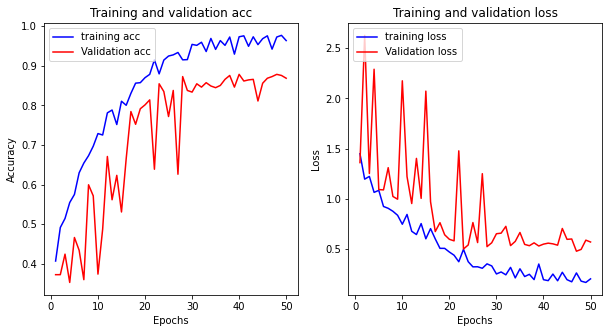

In [ ]:
kernal = (2,2)
model = getModel("tweak kernal",kernal)
model.summary()
history9 = trainModel(model,trainingSet=(partial_X_train,partial_Y_train),validationSet=(X_val,Y_val),epochs=50,callback_list=callbacks)
plot_history_results(history9.history)


### Analysis of Experiment 9 <a class="anchor" id="analysis_model9"></a>
| Optimal epoch | Validation loss | Validation accuracy | Comments                                  |
|---------------|-----------------|---------------------|-------------------------------------------|
| 47          | 0.4791       | 0.8725             | Model achieved optimal epoch at 47, with overfitting occurring in epoch 20  |

The table shown above shows the model's validation loss and accuracy at the optimal epoch of 47.

The plotted graph above shows the validation loss and accuracy decreasing, albeit fluctuating significantly early on, but stabilises after the 30th epoch. However, the model does begin to overfit after the 20th epoch, though the loss remains stable at around 0.5. 

Overall, the use of kernel size of (2,2) has shown promising results.

## Overall analysis of Experiments using kernel sizes 

| Model | Kernal size       | Optimal epoch | Validation loss | Validation accuracy |
|-------|---------------|---------------|-----------------|---------------------|
| 6     | (3,3)         | 33           |0.4516        |0.8950|
| 7     | (1,1)         | 29          | 0.4953       | 0.8151|
| 8     | (5,5)      | 22            | 0.4842          | 0.8641|
| 9     | (2,2)     | 47            | 0.4791          | 0.8725              



The table illustrated above gathers all the results achieved so far during the experiments with kernels. To compare the experiment with the default kernel size, I have added experiment 6 to the results.

As shown in the table, out of all the experimented kernel sizes, the optimal validation loss and accuracy improve with smaller kernel sizes, though there are limits. Model 9 has proved that the kernel size of (2,2) is optimal as it has achieved the best validation loss and accuracy compared to the other kernel size. The next optimal model is model 8, as the kernel size of (5,5) has also shown promising results within the validation loss and accuracy. And model 7 has similar results, albeit showed signs of slow progress compared to the other 2 kernel sizes. 

However, none of these experiments were able to improve upon the previous best model (experiment 6) which had the default kernel size of (3,3), which suggests the default kernel size is the optimal kernel size to go forward with.

The following iteration of experiments will use the kernel size of (3,3).

## Experimenting with drop out
For the next series of experiments, I will be using dropout. Dropout is a regularising technique that randomly selects neurons of a layer to be dropped out (ignored). 

The dropped neurons will be zeroed out and will not contribute towards the forward pass and backward pass. This will in effect reduce the capacity of the network from learning patterns that may not be relevant towards the testing data, but just enough to reduce overfitting and gain generalisation. 

For this reason, I will carry out several experiments with dropout and determine the optimal dropout rate for the current model. The dropout layer will be appended right after the model flattens its conv2d layers before it performs the classification task.

## 2.7.9 Model 10: dropout of 0.2 <a class="anchor" id="model10"></a>
This experiment will use a dropout of 0.2, will be trained for 50 epochs.

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 124, 124, 32)     0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 128)       7385

<Figure size 432x288 with 0 Axes>

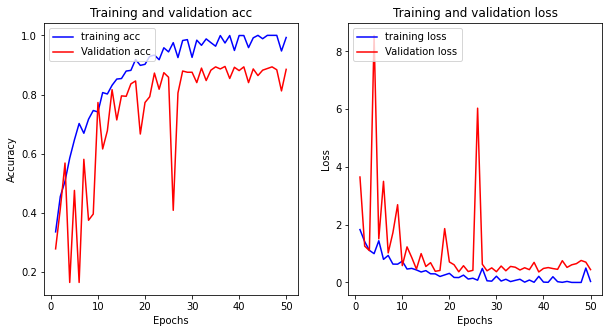

In [ ]:
dropout = 0.2
model = getModel("tweak dropout",dropout)
model.summary()
history10 = trainModel(model,trainingSet=(partial_X_train,partial_Y_train),validationSet=(X_val,Y_val),epochs=50,callback_list=callbacks)
plot_history_results(history10.history)

### Analysis of Experiment 10 <a class="anchor" id="analysis_model10"></a>
| Optimal epoch | Validation loss | Validation accuracy | Comments                                  |
|---------------|-----------------|---------------------|-------------------------------------------|
|39           | 0.3640        |0.8922              |The model begins to overfit around the 35th epoch, with the lowest validation loss occurring at epoch 39 |

The table shown above shows the model's validation loss and accuracy at the optimal epoch of 39.

The plotted graph shown above demonstrates some mitigation towards overfitting as the model was able to achieve a validation loss score of 0.3640, whilst overfitting at a much later epoch of 39. However, the metrics shown in the plot have huge fluctuations from the validation loss, though the symptoms of these fluctuations seem to calm down and stabilise after the 36th epoch.

Overall, the use of dropout at the rate of 0.2 has shown some promising results and has shown evidence of mitigating overfitting.

## 2.7.10 Model 11: dropout of 0.5 <a class="anchor" id="model11"></a>
This experiment will use a dropout of 0.5, will be trained for 50 epochs.

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 61, 61, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 59, 59, 128)       7385

<Figure size 432x288 with 0 Axes>

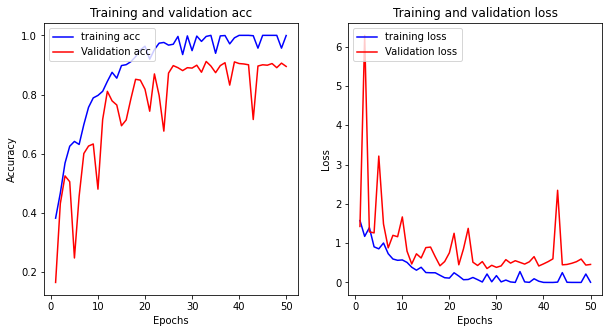

In [ ]:
dropout = 0.5
model = getModel("tweak dropout",dropout)
model.summary()
history11 = trainModel(model,trainingSet=(partial_X_train,partial_Y_train),validationSet=(X_val,Y_val),epochs=50,callback_list=callbacks)
plot_history_results(history11.history)


### Analysis of Experiment 11 <a class="anchor" id="analysis_model11"></a>
| Optimal epoch | Validation loss | Validation accuracy | Comments                                  |
|---------------|-----------------|---------------------|-------------------------------------------|
|28           | 0.3541        | 0.8810              |The model begins to overfit around the 20th epoch, with the lowest validation loss occurring at epoch 28 |

The table shown above shows the model's validation loss and accuracy at the optimal epoch of 28

The plotted graph above shows similar results compared to the last experiment, as both, validation loss and accuracy behave similarly. On the other hand, there seem to be some improvements as it has achieved a lower validation loss of 0.3541, and the fluctuating problem seen in the previous experiment seems to be more stable with using a dropout rate of 0.5.  

Overall, the use of 0.5 for dropout has achieved yet another improvement within the validation loss.

## 2.7.11 Model 12: dropout of 0.6 <a class="anchor" id="model12"></a>
This experiment will use a dropout of 0.6, will be trained for 50 epochs.

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 61, 61, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 59, 59, 128)       7385

<Figure size 432x288 with 0 Axes>

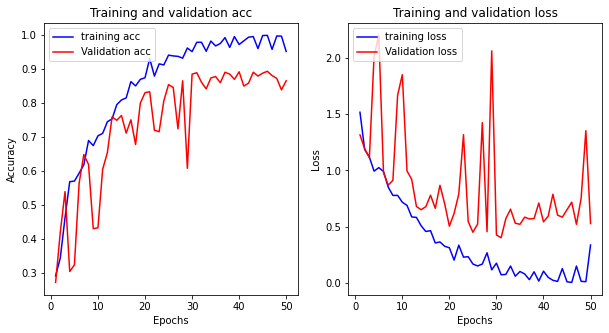

In [ ]:
dropout = 0.6
model = getModel("tweak dropout",dropout)
model.summary()
history12 = trainModel(model,trainingSet=(partial_X_train,partial_Y_train),validationSet=(X_val,Y_val),epochs=50,callback_list=callbacks)
plot_history_results(history12.history)


### Analysis of Experiment 12 <a class="anchor" id="analysis_model12"></a>
| Optimal epoch | Validation loss | Validation accuracy | Comments                                  |
|---------------|-----------------|---------------------|-------------------------------------------|
|31           |0.4008        |0.8894              |The model begins to overfit around the 11th epoch, the lowest validation loss occurs at epoch 31  |

The table shown above shows the model's validation loss and accuracy at the optimal epoch of EPOCH

The plotted graph above shows the validation loss and accuracy did not progress well compared to the previous dropout rates used. This can be seen in the intensity of fluctuations, resulting in a much more unstable validation loss, as can be seen from the metrics. 

Overall, increasing the dropout rate has only caused the results to become far more unstable.


## Overall analysis of Experiments using dropouts 

| Model | Dropout rate       | Optimal epoch | Validation loss | Validation accuracy |
|-------|---------------|---------------|-----------------|---------------------|
| 10     | 0.2         | 39           | 0.3640        |0.8922               |
| 11     | 0.5      |28           | 0.3541        | 0.8810              |
| 12     | 0.6     | 31           |0.4008        |0.8894              



The table illustrated above gathers all the results achieved so far during the experiments with dropouts.

As shown in the table, the optimal validation loss and accuracy improved when applying drop out as the loss score has significantly reduced. Model 11 has demonstrated that the use of dropout at a rate of 0.5 is optimal as it has achieved the best validation loss so far. The next optimal model is model 10, as the dropout rate of 0.2 has also shown promising results within the validation loss and accuracy. Whereas Model 8 has shown us that increasing the dropout rate above the optimal 0.5 increases overfitting and also causes the validation loss and accuracy to become more unstable.

The following iteration of experiments will be applying a dropout layer of rate 0.5.

## Experimenting with learning rate 
For this series of experiments, I will be tuning the learning rate. 
The learning rate is used during the gradient descent process, it determines the size of the step the algorithm should take for each iteration. 

The size of the learning rate can determine the time it will take for the model to converge. However, this may not always be the case as some learning rates will not lead to convergence. For instance, if the learning rate is too small, the model will take more iterations than necessary to reach a global minimum, and sometimes may land itself in a local minimum. Whereas if the loss is too large, the model loss value will overshoot the global minimum which may hinder the process of learning. 

For this reason, I will carry out several experiments with different learning rates and determine the optimal learning rate for the current model. I will not experiment with a loss of 1e-3 as this is the default learning rate, which has so far achieved a loss of 0.35 and 89% accuracy.


## 2.7.12 Model 13: Learning rate set to 1e-10 <a class="anchor" id="model13"></a>
This experiment will use a learning rate of 1e-10, and will be trained for 50 epochs.

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 250, 250, 3)]     0         
                                                                 
 conv2d_56 (Conv2D)          (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 61, 61, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 59, 59, 128)       738

<Figure size 432x288 with 0 Axes>

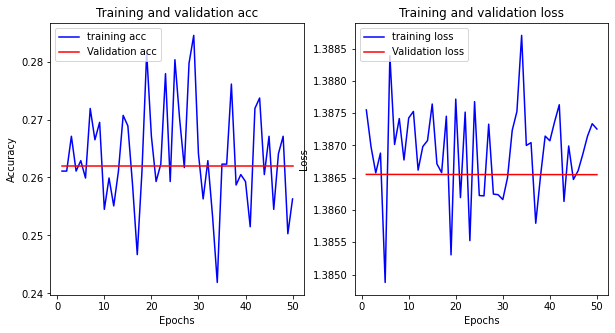

In [ ]:
lr = 1e-10
model = getModel("tweak learning rate",lr)
model.summary()
history13 = trainModel(model,trainingSet=(partial_X_train,partial_Y_train),validationSet=(X_val,Y_val),epochs=50,callback_list=callbacks)
plot_history_results(history13.history)


### Analysis of Experiment 13 <a class="anchor" id="analysis_model13"></a>
| Optimal epoch | Validation loss | Validation accuracy | Comments                                  |
|---------------|-----------------|---------------------|-------------------------------------------|
| 1          | 1.3865       | 0.2619             | The validation loss and accuracy have stalled, and there seems to be no process of learning  |

The table shown above shows the model's validation loss and accuracy, with the optimal epoch of 1.

The plotted graph above shows poor results as the use of the tiny learning rate of 1e-10 has caused our model to not progress beyond the first epoch. Validation loss and accuracy remain constant without any change. This could be because the learning rate is far too small for any real progress to be made. It may have trapped itself to a local minimum during the gradient descent process.

Overall, the use of a learning rate of 1e-10 has caused the model to not learn and resulted in poor results.

## 2.7.13 Model 14: Learning rate set to 1e-5 <a class="anchor" id="model14"></a>
This experiment will use a learning rate of 1e-5 and will be trained for 50 epochs.

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 250, 250, 3)]     0         
                                                                 
 conv2d_32 (Conv2D)          (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 61, 61, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 59, 59, 128)       738

<Figure size 432x288 with 0 Axes>

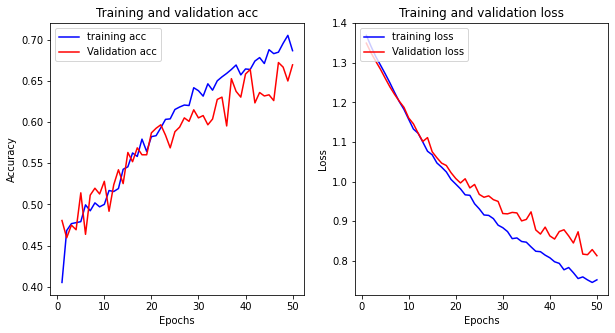

In [ ]:
lr = 1e-5
model = getModel("tweak learning rate",lr)
model.summary()
history14 = trainModel(model,trainingSet=(partial_X_train,partial_Y_train),validationSet=(X_val,Y_val),epochs=50,callback_list=callbacks)
plot_history_results(history14.history)


### Analysis of Experiment 14 <a class="anchor" id="analysis_model14"></a>
| Optimal epoch | Validation loss | Validation accuracy | Comments                                  |
|---------------|-----------------|---------------------|-------------------------------------------|
| 50          | 0.8128        | 0.6695             |The model begins to overfit around the 20th epoch, the lowest validation loss occurs at epoch 50
  |

The table shown above shows the model's validation loss and accuracy at the optimal epoch of 50

The plotted graph above shows significant results as the validation loss and accuracy seem to be very stable. However, the validation loss and accuracy seems to be progressing at a much rate, and there's clearly more patterns needed to be learnt.

Overall, the use of 1e-5 has shown promising results within the metrics.

## 2.7.14 Model 15: Learning rate set to 1e-4 <a class="anchor" id="model15"></a>
This experiment will use a learning rate of 1e-4, will be trained for 50 epochs

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 250, 250, 3)]     0         
                                                                 
 conv2d_84 (Conv2D)          (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 61, 61, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_86 (Conv2D)          (None, 59, 59, 128)       738

<Figure size 432x288 with 0 Axes>

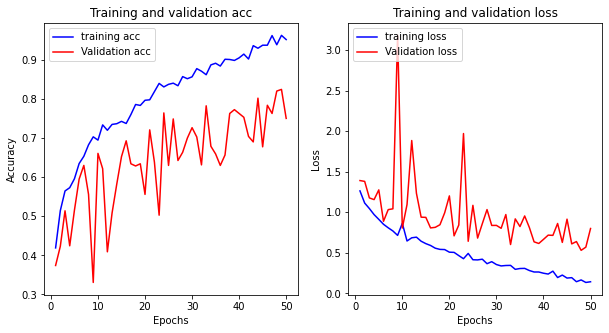

In [ ]:
lr = 1e-4
model = getModel("tweak learning rate",lr)
model.summary()
history15 = trainModel(model,trainingSet=(partial_X_train,partial_Y_train),validationSet=(X_val,Y_val),epochs=50,callback_list=callbacks)
plot_history_results(history15.history)


### Analysis of Experiment 15 <a class="anchor" id="analysis_model15"></a>
| Optimal epoch | Validation loss | Validation accuracy | Comments                                  |
|---------------|-----------------|---------------------|-------------------------------------------|
|48           |0.5309        |0.8207              |The model begins to overfit around the 10th epoch, with the lowest validation loss occurring at epoch 48  |

The table shown above shows the model's validation loss and accuracy at the optimal epoch of 48

The plotted graph illustrated above shows the validation loss and accuracy starting off rather unstable but doesn't fluctuate significantly compared to using a learning rate of 1e-3. However, the validation loss and accuracy are progressing slowly compared to the previous best models.

## 2.7.15 Model 16: Learning rate set to 1e-2 <a class="anchor" id="model16"></a>
This experiment will use a learning rate set to 1e-2, will be trained for 50 epochs.

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 250, 250, 3)]     0         
                                                                 
 conv2d_88 (Conv2D)          (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_94 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_89 (Conv2D)          (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_95 (MaxPoolin  (None, 61, 61, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_90 (Conv2D)          (None, 59, 59, 128)       738

<Figure size 432x288 with 0 Axes>

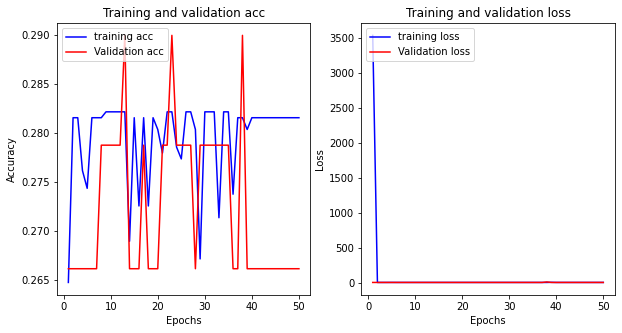

In [ ]:
lr = 1e-2
model = getModel("tweak learning rate",lr)
model.summary()
history16 = trainModel(model,trainingSet=(partial_X_train,partial_Y_train),validationSet=(X_val,Y_val),epochs=50,callback_list=callbacks)
plot_history_results(history16.history)


### Analysis of Experiment 16 <a class="anchor" id="analysis_model16"></a>
| Optimal epoch | Validation loss | Validation accuracy | Comments                                  |
|---------------|-----------------|---------------------|-------------------------------------------|
|1           |1.3695        |0.2661              |Validation accuracy and loss doesn't change and remains constant.  |

The table shown above shows the model's validation loss and accuracy at the optimal epoch of EPOCH

The plotted graph above shows has shown poor results within the validation loss and accuracy. This can be seen in the graph as the validation loss remains constant whereas, the validation accuracy jumps between 0.2661 and 0.2899. The use of the higher learning rate has caused the model to overshoot the global minimum. As a consequence, this has hindered the model's ability to learn.


## Overall analysis of Experiments of tuning learning rate 

| Model | Dropout rate       | Optimal epoch | Validation loss | Validation accuracy |
|-------|---------------|---------------|-----------------|---------------------|
| 13     | 1e-10         | 1          | 1.3865       | 0.2619               |
| 14     | 1e-5      |50          | 0.8128        | 0.6695             |
| 15     | 1e-4     | 48           |0.5309        |0.8207             
| 16     | 1e-2     | 1           |1.3695        |0.2661              



The table illustrated above shows the optimal validation loss and accuracy for each experiment using different learning rates

As you can see, Model 14's showed some improvements as the metrics seemed to be a lot less noisy and smooth, however, progress seemed to be a lot slower. In contrast, model 15's progress seemed far more noisy and unstable but did progress a lot faster. Whereas models 13 and 16 proved that having a far small or large learning rate can be detrimental to the progress of the network, resulting in no learning. 

Whilst these learning rates showed interesting results, I will still stick with the default learning rate of 1e-3, as it maintains the optimal results in terms of validation loss and epoch, which is 0.3541 and 0.89% respectively, hence going forward I will stick with the default learning rate.

## Experimenting with batch normalization
For the next experiment, I will be using batch normalization.
The use of batch normalization was mentioned in chapter 7 of Chollet's book (deep learning with python) and suggested that using batch normalization may help towards overfitting avoidance. 

As we know, normalization is a technique that enables different samples seen by the machine learning model more similar to each other. This helps the model's learning process and improves the generalization on new data. Typically, normalization is done by taking the mean of all input values and dividing it by the standard deviation.

Batch normalization is a layer that is actively used during training, and its role is to normalise data at each output layer. The effects of this layer help smooth out the gradient, enabling stable and faster training.

For this reason, the next experiment will be using batch normalization.


## 2.7.16 Model 17: Batch normalization <a class="anchor" id="model17"></a>
For this experiment, I will be using batch normalization. The model will apply the batch normalization layer after each conv2d layer. The model will be trained for 50 epochs.

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 250, 250, 3)]     0         
                                                                 
 conv2d_92 (Conv2D)          (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_98 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 124, 124, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_93 (Conv2D)          (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_99 (MaxPoolin  (None, 61, 61, 64)       0  

<Figure size 432x288 with 0 Axes>

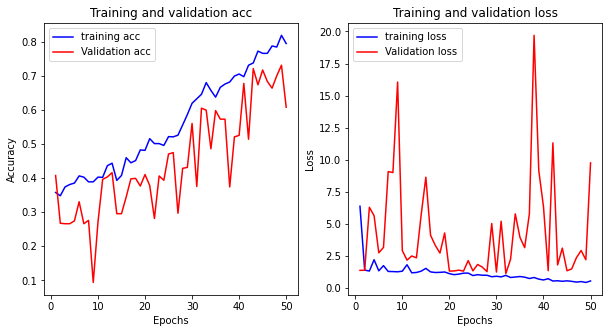

In [ ]:
model = getModel("batch normalization")
model.summary()
history17 = trainModel(model,trainingSet=(partial_X_train,partial_Y_train),validationSet=(X_val,Y_val),epochs=50,callback_list=callbacks)
plot_history_results(history17.history)


### Analysis of Experiment 17 <a class="anchor" id="analysis_model17"></a>
| Optimal epoch | Validation loss | Validation accuracy | Comments                                  |
|---------------|-----------------|---------------------|-------------------------------------------|
|32           |1.1261        |0.6050               |The validation loss and training seem to be very noisy and unstable, and overfitting occurs after the 28th epoch. |

The table shown above shows the model's validation loss and accuracy at the optimal epoch of 32.

The plot above shows the results of the validation loss and accuracy seeming very unstable and noisy, achieving a low loss of 1.12 at epoch 32. After epoch 32, the loss can be seen to become very unstable, and to the point in epoch 38 sees an increase in loss to 19. Overfitting can be seen occurring after the 28th epoch as loss starts to become unstable.

The best validation accuracy was 73%, which was recorded in epoch 49, however, this does not matter as the lowest loss is focused on determining the model performance.

## Overall analysis of Experiment with batch normalization

| Model | Optimal epoch | Validation loss | Validation accuracy |
|-------|---------------|---------------|-----------------|
| 11 (Without BN)     | 28         | 0.3541          | 0.8810   |             |
| 17 (With BN)    | 32           |1.1261        |0.6050        |




The table illustrated above gathers the results achieved so far during the experiments with batch normalization. I even displayed the validation loss and accuracy without the batch normalization so that I can compare.

As shown in the table, the use of batch normalization shown in experiment 17 demonstrated far worse results as it achieved a validation loss and accuracy of 1.1261 and 0.6050 respectively. In contrast, model 11 (current baseline) achieved a better validation loss and accuracy of 0.3541 and 0.8810. Using batch normalization did not show any improvements in validation metrics.

For this reason, I've decided not to go forward with batch normalization for the next iteration of experiments.

## Experimenting with data augmentation
The next experiment will be using data augmentation. The use of data augmentation was mentioned in chapter 5 of Chollet's book (deep learning with python), specific for computer vision tasks.

While the convolutional neural network produces excellent results during computer vision tasks, those results can easily suffer from deterioration as CNNS has a few flaws. These flaws emerge when using images that are slightly rotated or distorted. Fortunately, data augmentation aims to resolve this issue. 

Data augmentation is a technique that takes the approach of using existing training data and generates new training data by augmenting the existing samples using random transformation. These transformations involve randomly rotating, distorting and zooming in/out. 

In theory, data augmentation should help mitigate overfitting since the model learns newer and more general patterns amongst data, this, in turn, helps generalization.

Due to these reasons, the next experiment will be using data augmentation.


## 2.7.17 Model 18: Data augmentation <a class="anchor" id="model18"></a>
This experiment will use data augmentation. Here I will instead train this model for 100 epochs.

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 124, 124, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 59, 59, 128)       7385

<Figure size 432x288 with 0 Axes>

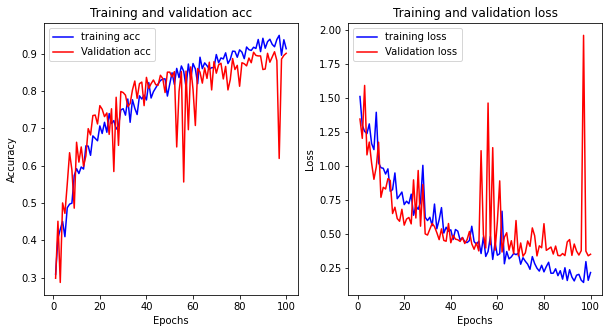

In [ ]:
model = getModel("augmentation")
model.summary()
history18 = trainModel(model,trainingSet=(partial_X_train,partial_Y_train),validationSet=(X_val,Y_val),epochs=100,callback_list=callbacks,useAugmentation=True)
plot_history_results(history18.history)

### Analysis of Experiment 18 <a class="anchor" id="analysis_model18"></a>
| Optimal epoch | Validation loss | Validation accuracy | Comments                                  |
|---------------|-----------------|---------------------|-------------------------------------------|
|71           |0.3364        |0.8697              |The model begins to overfit around the 60th epoch, with the lowest validation loss occurring at epoch 71   |

The table shown above shows the model's validation loss and accuracy at the optimal epoch of 71.

The plot above shows the results of the validation loss and accuracy starting off well before the 50th epoch where the data seems unstable. The lowest validation loss achieved was 0.3364 at epoch 71 which makes it the best performing model yet. 

Overfitting occurs after epoch 50 as the validation loss can be seen to become very unstable, but does seem to be stable off. The metrics of the training and validation seem to be very closely correlated, which is good.

## Overall analysis of Experiment with data augmentation

| Model | Optimal epoch | Validation loss | Validation accuracy |
|-------|---------------|---------------|-----------------|
| 11 (Without DA)     | 28         | 0.3541          | 0.8810   |             |
| 18 (With DA)    | 71           |0.3364        |0.8697         |




The table illustrated above gathers the results achieved so far during the experiments with batch normalization. Experiment 11 (current best model) was also added to compare as it does not use data augmentation.

As shown in the table, the use of data augmentation shown in experiment 18 showed significant improvements within the validation loss as it achieved the now current best loss of 0.3364, whereas the previous best loss was recorded in experiment 11 which had 0.3541.

When compared between plots of experiments 11 and 18, experiment 18 seems to have shown a stronger correlation between training and validation loss, suggesting better generalization.

Using data augmentation proved to be significant towards overfitting mitigation, hence, I will use data augmentation for my next iteration of experiments.

## Experimenting with feature extraction
The next experiment will be using feature extraction. The use of feature extraction was mentioned and demonstrated in chapter 5 of Chollet's book (deep learning with python).

Feature extraction consists of using the representations learned by a previous network to extract interesting features from new samples. These features are then run through a new classifier, which is trained from scratch. 

The way it works is by taking a previously trained network (pretrained), removing its originally trained classifier and appending a new classifier specific for the task. The base of the pretrained model is frozen so that its weights will remain unchanged during the training process, this is because the weights are already trained and contain highly generic feature maps.

The network's classifier will then be trained, resulting in the pretrained network being repurposed for the task of classifying brain tumours from MRI images.

For the experiment, I will be using the VGG16 pretrained network (as used in Chollet's book in chapter 5). VGG16 is a pretrained network packaged by Keras and can be easily imported into TensorFlow using "keras.applications" module. The network has already been trained on over one thousand images, using the ImageNet dataset.

Due to these reasons, the next experiment will be using feature extraction.


## 2.7.18 Model 19: Feature extraction <a class="anchor" id="mode19"></a>
This experiment will use feature extraction. This time I will train the model for 100 epochs.

Model: "model_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_80 (InputLayer)       [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0  

<Figure size 432x288 with 0 Axes>

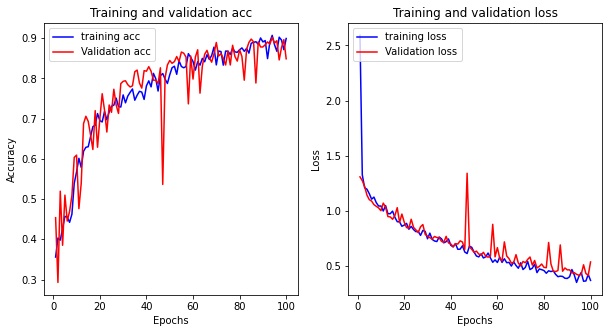

In [ ]:
model = getModel("pre-trained network")
model.summary()
history19 = trainModel(model,trainingSet=(partial_X_train,partial_Y_train),validationSet=(X_val,Y_val),epochs=100,callback_list=callbacks,useAugmentation=True)
plot_history_results(history19.history)

### Analysis of Experiment 19 <a class="anchor" id="analysis_model19"></a>
| Optimal epoch | Validation loss | Validation accuracy | Comments                                  |
|---------------|-----------------|---------------------|-------------------------------------------|
|99           |0.4147         |0.8964              |The model begins to overfit around the 47th epoch, the lowest validation loss occurs at epoch 99   |

The table shown above shows the model's validation loss and accuracy at the optimal epoch of 99.

The plot above shows the results of the validation loss and accuracy starting off well until the 47th epoch where the validation loss becomes a bit noisy. The lowest validation loss achieved was 0.4147  at epoch 99.  

The results are impressive as compared to the previous experiments, the validation loss and accuracy seem to correlate with the training loss and accuracy really well, and the fluctuation problem seen in the previous experiment seemed to have been mostly mitigated. However slight Overfitting can be seen after the 47 epoch, though fortunately, the validation loss and accuracy do seem to show really good progress.

## Experimenting with feature extraction and fine-tuning
In addition to the previous experiment (feature extraction), I will be using feature extraction with fine-tuning. The use of fine-tuning was mentioned and demonstrated in chapter 5 of Chollet's book (deep learning with python).

As feature extraction involved using pretrained model with its weights all frozen, whilst having a new classifier to train, fine-tuning is a popular technique that involves unfreezing a couple of layers in the pretrained model so that it can be trained.

The effects of fine-tuning enable the pretrained network to adjust more towards the purpose of this task. This in theory should help the model generalise more, allowing it to yield better results.

Like the previous experiment, I will be using the VGG16 network as it has proven to show promising results. 

For these reasons, my next experiment will involve fine-tuning a network.

## 2.7.19 Model 20: fine tuning <a class="anchor" id="model20"></a>
This experiment will use feature extraction with fine-tuning. The VGG16 network contains in total 5 CNN blocks. I will be fine-tuning the last block, which is block 5. The model will be trained for 100 epochs.

input_77  False
block1_conv1  False
block1_conv2  False
block1_pool  False
block2_conv1  False
block2_conv2  False
block2_pool  False
block3_conv1  False
block3_conv2  False
block3_conv3  False
block3_pool  False
block4_conv1  False
block4_conv2  False
block4_conv3  False
block4_pool  False
block5_conv1  True
block5_conv2  True
block5_conv3  True
block5_pool  True
Model: "model_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_77 (InputLayer)       [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                     

<Figure size 432x288 with 0 Axes>

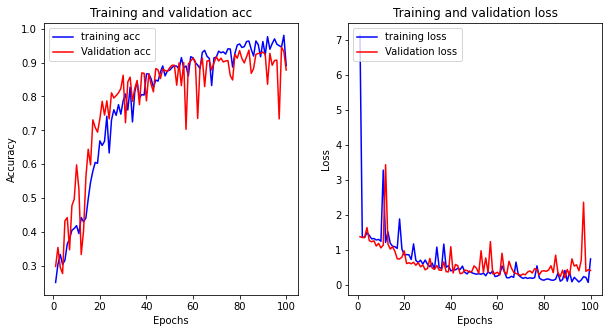

In [ ]:
model = getModel("fine tuned network")
model.summary()
history20 = trainModel(model,trainingSet=(partial_X_train,partial_Y_train),validationSet=(X_val,Y_val),epochs=100,callback_list=callbacks,useAugmentation=True)
plot_history_results(history20.history)

### Analysis of Experiment 20 (Final) <a class="anchor" id="analysis_model20"></a>
| Optimal epoch | Validation loss | Validation accuracy | Comments                                  |
|---------------|-----------------|---------------------|-------------------------------------------|
|89           |0.1983        |0.9272              |The model begins to overfit around the 60th epoch, and the lowest validation loss occurs at epoch 89   |



The table shown above shows the model's validation loss and accuracy at the optimal epoch of 89.

The plot above demonstrates the results of the validation loss and accuracy starting off well until the 50th epoch where the validation loss becomes slightly noisy. The model achieved an impressive 0.1983 for its lowest loss validation, which was achieved in epoch 89. Whereas, the highest validation accuracy recorded was 0.9454! Which was recorded in epoch 98.

The use of fine-tuning proved to show very impressive results, making it the best performing model yet. However slight Overfitting can be seen after the 60th  epoch.

## Overall analysis of Experiment with feature extraction and fine-tuning

| Model | Optimal epoch | Validation loss | Validation accuracy |
|-------|---------------|---------------|-----------------|
| 11 (Without feature extraction)     | 28         | 0.3541          | 0.8810   |             |
| 19 (With feature extraction)    | 99           |0.4147         |0.8964 |
| 20 (With feature extraction + fine tuning)    | 89           |0.1983        |0.9272 |




The table shown above contains the results of all the experiments gathered so far for feature extraction and fine-tuning. To compare the model with and without using feature extraction, I have appended experiment 11 to the table.

As shown in the table, the best optimal model achieved so far was model 20, as it has achieved an astounding validation loss of 0.1983, and even achieved a high accuracy of 92%, but also achieving 94% in some epochs! This goes to show the power of using feature extraction while fine-tuning. Experiment 20 seems to have mostly mitigated overfitting and the fluctuating problem, which was seen in the previous baseline model of experiment 11. 

The second best model was experiment 19 as it significantly mitigated overfitting as it achieved an optimal epoch of 99 with validation loss and accuracy of 0.4147 and 0.8964 respectively, whilst still showing signs of progress. 

Overall, the use of feature extraction has shown really good results and proved to mitigate, whereas fine-tuning enhanced the results.


## 3 Results <a class="anchor" id="results"></a>
| Model                        | Optimal epoch | Validation loss | Validation accuracy | Filters       | Kernal size | Batch normalization | Learning rate  | Dropout | Data augmentation | Feature extraction | Fine tuning |
|------------------------------|---------------|-----------------|---------------------|---------------|-------------|---------------------|----------------|---------|-------------------|--------------------|-------------|
| Model 1: Simple network      | 5             | 0.9930          | 0.6218              | 16-32         | (3,3)       | No                  | Default (1e-3) | N/A     | No                | No                 | No          |
| Model 2: Overfit model       | 15            | 0.5240          | 0.8487              | 32-64         | (3,3)       | No                  | Default (1e-3) | N/A     | No                | No                 | No          |
| Model 3: filters of 32-32    | 10            | 0.5330          | 0.8179              | 32-32         | (3,3)       | No                  | Default (1e-3) | N/A     | No                | No                 | No          |
| Model 4: filters of 32-64-64 | 15            | 0.5264          | 0.8431              | 32-64-64      | (3,3)       | No                  | Default (1e-3) | N/A     | No                | No                 | No          |
| Model 5: filters of 32-64-128  |37          | 0.6134       |0.7493                     | 32-64-128     | (3,3)       | No                  | Default (1e-3) | N/A     | No                | No                 | No          |
| Model 6: filters of 32-64-128-512 |33           |0.4516        |0.8950                | 32-64-128-512 | (3,3)       | No                  | Default (1e-3) | N/A     | No                | No                 | No          |
| Model 7: kernal of (1,1)     | 29          | 0.4953       | 0.8151                   | 32-64-128-512 | (1,1)       | No                  | Default (1e-3) | N/A     | No                | No                 | No          |
| Model 8: kernal of (5,5)     | 22          |0.4842        | 0.8641                   | 32-64-128-512 | (5,5)       | No                  | Default (1e-3) | N/A     | No                | No                 | No          |
| Model 9: kernal of (2,2)     | 47          | 0.4791       | 0.8725                  | 32-64-128-512 | (2,2)       | No                  | Default (1e-3) | N/A     | No                | No                 | No          |
| Model 10: dropout of 0.2     | 39           | 0.3640        |0.8922                   | 32-64-128-512 | (3,3)       | No                  | Default (1e-3) | 0.2     | No                | No                 | No          |
| Model 11: dropout of 0.5     | 28           | 0.3541        | 0.8810               | 32-64-128-512 | (3,3)       | No                  | Default (1e-3) | 0.5     | No                | No                 | No          |
| Model 12: dropout of 0.6     | 31           |0.4008        |0.8894                   | 32-64-128-512 | (3,3)       | No                  | Default (1e-3) | 0.6     | No                | No                 | No          |
| Model 13: Learning rate set to 1e-10  | 1          | 1.3865       | 0.2619                               | 32-64-128-512 | (3,3)       | No                  | 1e-10          | 0.5     | No                | No                 | No          |
| Model 14: Learning rate set to 1e-5 | 50          | 0.8128        | 0.6695                    | 32-64-128-512 | (3,3)       | No                  | 1e-5           | 0.5     | No                | No                 | No          |
| Model 15: Learning rate set to 1e-4 | 48           |0.5309        |0.8207                 | 32-64-128-512 | (3,3)       | No                  | 1e-4           | 0.5     | No                | No                 | No          |
| Model 16: Batch normalization  | 1           |1.3695        |0.2661                   | 32-64-128-512 | (3,3)       | No                  | 1e-2           | 0.5     | No                | No                 | No          |
| Model 17: Batch normalization  | 32           |1.1261        |0.6050                   | 32-64-128-512 | (3,3)       | Yes                 | Default (1e-3) | 0.5     | No                | No                 | No          |
| Model 18: Data augmentation  | 71           |0.3364        |0.8697                   | 32-64-128-512 | (3,3)       | No                  | Default (1e-3) | 0.5     | Yes               | No                 | No          |
| Model 19: Feature extraction | 99           |0.4147         |0.8964                  | VGG16 layers  | (3,3)       | No                  | Default (1e-3) | 0.5     | Yes               | Yes                | No          |
| Model 20: fine tuning | 89           |0.1983        |0.9272                   | VGG16 layers  | (3,3)       | No                  | Default (1e-3) | 0.5     | Yes               | Yes                | Yes         |



The table above displays all the results gathered so far during this investigation. 

As shown in the table, each row represents an iteration throughout the experiment, whereas each column describes each property used for a specific experiment. About 11 properties were experimented with within a total of 20 iterations, with each property involving tuning certain hyperparameters or experimenting with techniques used for overfitting avoidance. 

## 3.1 Final model <a class="anchor" id="final_model"></a>
It was concluded that the last iteration (Model 20: fine-tuning) achieved the best optimal performance as it achieved the lowest loss and highest accuracy so far, which is 0.1983 and 0.9273 (almost 93%!) respectively. Compared to the initial overfitted model (model 2), this final model has largely mitigated the effects of overfitting, thus making this model my final model. 

Just to reiterate, the architecture of the final model consists of:
- Feature extraction using VGG16 
- block 5 of the base architecture is fine-tuned
- A kernel size of (3,3)
- Learning rate of 1e-3



## 3.1.1 Retrain the model at the optimal epoch <a class="anchor" id="retrain"></a>
I will now retrain the final model. It was noted that the optimal epoch occurred between a range of 70-90 epochs as this range produced the best optimal values. I will retrain the final model up to 80 epochs.

Data augmentation will also be used as this helps mitigate overfitting.

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0   

<Figure size 432x288 with 0 Axes>

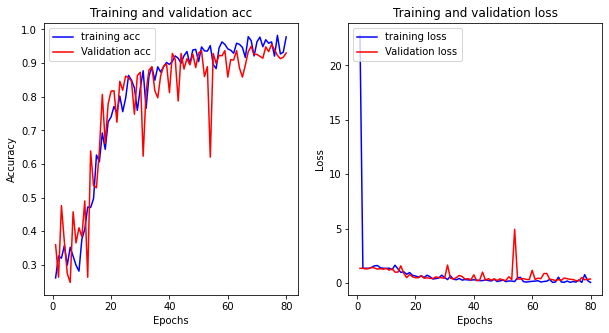

In [ ]:
##Final model 
Optimal_epochs = 80
model = getModel("fine tuned network")
model.summary()
historyFinal = trainModel(model,trainingSet=(partial_X_train,partial_Y_train),validationSet=(X_val,Y_val),epochs=Optimal_epochs,callback_list=callbacks,useAugmentation=True)
plot_history_results(historyFinal.history)

## 3.1.2 Testing the final model <a class="anchor" id="testing"></a>
After training the final model to the optimal epoch, I will finally test the model on unseen testing data I have created earlier.

In [ ]:
testModel(model,X_test,Y_test)

19/19 [==============================] - 2s 79ms/step - loss: 0.8037 - accuracy: 0.9108
Printing the first 50 predictions vs targets
Predicted class: meningioma_tumor vs Actual class : meningioma_tumor
Predicted class: pituitary_tumor vs Actual class : pituitary_tumor
Predicted class: pituitary_tumor vs Actual class : pituitary_tumor
Predicted class: meningioma_tumor vs Actual class : meningioma_tumor
Predicted class: no_tumor vs Actual class : meningioma_tumor
Predicted class: glioma_tumor vs Actual class : glioma_tumor
Predicted class: pituitary_tumor vs Actual class : pituitary_tumor
Predicted class: pituitary_tumor vs Actual class : pituitary_tumor
Predicted class: glioma_tumor vs Actual class : glioma_tumor
Predicted class: pituitary_tumor vs Actual class : pituitary_tumor
Predicted class: no_tumor vs Actual class : no_tumor
Predicted class: glioma_tumor vs Actual class : meningioma_tumor
Predicted class: glioma_tumor vs Actual class : glioma_tumor
Predicted class: meningioma_tumo

The model has been tested and the loss and accuracy resulted in 0.8037 and 0.9108 respectively. An increase in loss was expected as the model was tested against newer unseen data. Nevertheless, the accuracy is astounding as it has achieved 91%.

And the printed results reinforced the 91% accuracy as out of the 50 predictions, 47 of them were correct whereas 3 were falsely predicted, which makes it an impressive 94% accuracy.

## 4 Conclusions <a class="anchor" id="conclusion"></a>
To conclude this investigation, I successfully was able to use the MRI dataset to solve a multi categorial problem involving computer vision techniques using convolutional neural networks. This was possible by following the 7 steps of universal deep learning workflow. 

Throughout this investigation, I was able to define the problem, choose a measure of success, decided on an evaluation protocol, prepared my data, develop a model that does better than the baseline, develop a model that overfits, and then undergone several iterative experiments. And after all this, it resulted in a model that achieved an impressive accuracy of 91% on new unseen data.

## 4.1 Revisiting the hypothesis <a class="anchor" id="revisit_hypothesis"></a>
To revisit, these were my two hypotheses:
- The data I will be using will be sufficient enough to learn the relationship between inputs and outputs.
- The classification of MRI brain tumours can be predicted from the given input data.

My first hypothesis turned out to be true as the first couple of models were able to achieve 80-84% validation accuracy, which suggests the data was sufficient enough to learn the relationship between the input and the outputs.

The second hypothesis also turned out to be true as the test cases resulted with 91% accuracy, which suggests the neural network was able to map input data to their corresponding output data. 

### 4.2 Future investigation: <a class="anchor" id="future_investigations"></a>
Whilst the results achieved from my final model were good, I believe the results could've been better as I can experiment with another type of pretrained model. 

I also researched other types of computer vision networks that seek to overcome the many issues faced by CNNs. One in particular does and is known as a capsule neural network. 

The capsule neural network has the ability to learn spatial relations between features from the input data, which is something completely lost in CNN due to the feature map. Also, CNN's cannot handle rotations and will need to rely on data augmentation, whereas capsule networks can handle rotations. Of the many problems CNN's performed on, capsule networks were reported to perform better.

Perhaps in the future, I can look into the use of capsule networks and investigate their use for the task of MRI brain tumour classification. I may also investigate other types of pretrained networks. 


## 5 References <a class="anchor" id="references"></a>
1. Sartaj., 2019. Brain Tumor Classification (MRI). [online] Kaggle.com. Available at: <https://www.kaggle.com/sartajbhuvaji/brain-tumor-classification-mri/code> [Accessed December 2021].
2. Francois Chollet. 2017. Deep Learning with Python (1st. ed.). Manning Publications Co., USA.
